In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import pandas as pd

# 📂 Thư mục gốc chứa các thư mục con
base_folder = '/kaggle/input/topic-news/June'

# Danh sách lưu DataFrame
dfs = []

# Duyệt toàn bộ thư mục con và file .gkg.csv
for root, dirs, files in os.walk(base_folder):
    for fname in files:
        if fname.endswith('.gkg.csv'):
            fpath = os.path.join(root, fname)
            try:
                df = pd.read_csv(
                    fpath,
                    sep="\t",
                    header=None,
                    encoding="latin1",
                    usecols=[0, 3, 10],  # DATE, THEMES, SOURCEURLS
                    names=["DATE", "THEMES", "SOURCEURLS"],
                    skiprows=1
                )
                dfs.append(df)
                print(f"✅ Đã nối {fname} ({len(df)} dòng)")
            except Exception as e:
                print(f"⚠️ Lỗi với {fname}: {e}")

# Gộp tất cả lại
df1 = pd.concat(dfs, ignore_index=True)




✅ Đã nối 20250606.gkg.csv (153413 dòng)
✅ Đã nối 20250608.gkg.csv (98686 dòng)
✅ Đã nối 20250601.gkg.csv (102214 dòng)
✅ Đã nối 20250605.gkg.csv (151000 dòng)
✅ Đã nối 20250609.gkg.csv (142771 dòng)
✅ Đã nối 20250602.gkg.csv (153680 dòng)
✅ Đã nối 20250604.gkg.csv (153290 dòng)
✅ Đã nối 20250603.gkg.csv (152447 dòng)
✅ Đã nối 20250610.gkg.csv (162079 dòng)
✅ Đã nối 20250607.gkg.csv (117178 dòng)


In [2]:
df1.head()

,DATE,THEMES,SOURCEURLS
0,20250606,TERROR;ARMEDCONFLICT;TAX_ETHNICITY_VENEZUELANS...,https://www.theguardian.com/world/109337/1004
1,20250606,ARREST;TAX_FNCACT;TAX_FNCACT_OFFICIALS;TRIAL;T...,https://edition.cnn.com/700769/world/news-5678...
2,20250606,WB_826_TOURISM;WB_1921_COMPETITIVE_AND_REAL_SE...,https://edition.cnn.com/524530/world/news-7383...
3,20250606,TAX_FNCACT_POLICE;SOC_POINTSOFINTEREST_PRISON;...,https://www.singletonargus.com.au/story/842179...
4,20250606,TRIAL;TAX_FNCACT;TAX_FNCACT_LAWYER;TAX_FNCACT_...,https://www.nytimes.com/642066/world/2261/


In [3]:
import pandas as pd

# Đọc dữ liệu từ file April + May
df_april_may = pd.read_csv("/kaggle/input/topic-news/merged_April_May_DATE_THEMES_URL.csv")

# Đảm bảo cột trùng nhau giữa df_april_may và df1
df_april_may = df_april_may[["DATE", "THEMES", "SOURCEURLS"]]
df1 = df1[["DATE", "THEMES", "SOURCEURLS"]]

# Nối hai DataFrame
df_all = pd.concat([df_april_may, df1], ignore_index=True)

# Lưu kết quả ra file mới
df_all.to_csv("/kaggle/working/merged_April_May_June_DATE_THEMES_URL.csv", index=False)

# Kiểm tra thông tin kết quả
print("✅ Gộp xong, số dòng:", len(df_all))
print("🕒 Thời gian từ:", df_all['DATE'].min(), "→", df_all['DATE'].max())
df_all.head()


✅ Gộp xong, số dòng: 10037131
🕒 Thời gian từ: 20250401 → 20250610


,DATE,THEMES,SOURCEURLS
0,20250401,ARREST;TAX_FNCACT;TAX_FNCACT_OFFICIALS;TRIAL;T...,https://710keel.com/ixp/182/p/shreveport-most-...
1,20250401,ARREST;TAX_FNCACT;TAX_FNCACT_OFFICIALS;TRIAL;T...,https://www.singletonargus.com.au/story/811948...
2,20250401,WB_1979_NATURAL_RESOURCE_MANAGEMENT;WB_435_AGR...,https://www.goulburnpost.com.au/story/8025295/...
3,20250401,PUBLIC_TRANSPORT;WB_135_TRANSPORT;WB_1803_TRAN...,https://www.bbc.com/news/world-177829-6642
4,20250401,TAX_FNCACT_POLICE;SOC_POINTSOFINTEREST_PRISON;...,https://www.singletonargus.com.au/story/955764...


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


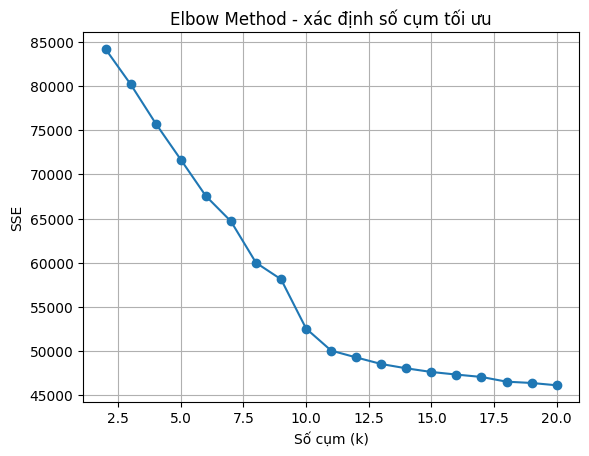

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample 100,000 dòng
sample_df = df_all.sample(100000, random_state=42)

# Làm sạch
sample_df["THEMES_CLEAN"] = sample_df["THEMES"].fillna("").str.replace(";", " ", regex=False)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_sample = vectorizer.fit_transform(sample_df["THEMES_CLEAN"])

# Elbow method
sse = []
k_range = range(2, 21)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_sample)
    sse.append(km.inertia_)

# Vẽ Elbow
plt.plot(k_range, sse, marker='o')
plt.xlabel("Số cụm (k)")
plt.ylabel("SSE")
plt.title("Elbow Method - xác định số cụm tối ưu")
plt.grid(True)
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Làm sạch lại nếu chưa
df_all["THEMES_CLEAN"] = df_all["THEMES"].fillna("").str.replace(";", " ", regex=False)

# TF-IDF toàn bộ (giữ lại 1000 từ khóa phổ biến nhất)
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df_all["THEMES_CLEAN"])

# Phân cụm với k=10
kmeans = KMeans(n_clusters=10, random_state=42)
df_all["CLUSTER"] = kmeans.fit_predict(X_tfidf)

print("✅ Gán nhãn cụm xong. Ví dụ:")
print(df_all[["DATE", "CLUSTER"]].head())


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


✅ Gán nhãn cụm xong. Ví dụ:
       DATE  CLUSTER
0  20250401        9
1  20250401        9
2  20250401        0
3  20250401        3
4  20250401        1


In [5]:
import numpy as np

# Lấy danh sách từ khóa
terms = np.array(vectorizer.get_feature_names_out())
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("📌 Top 5 từ khóa mỗi cụm:")
for i in range(10):
    top_terms = terms[order_centroids[i, :5]]
    print(f"Cụm {i}: {', '.join(top_terms)}")



📌 Top 5 từ khóa mỗi cụm:
Cụm 0: wb_1884_airports_tourism, wb_1986_mountains, wb_1979_natural_resource_management, soc_pointsofinterest_airport, wb_435_agriculture_and_food_security
Cụm 1: wb_2405_detention_reform, soc_pointsofinterest_prison, wb_2490_national_protection_and_security, tax_fncact_police, wb_2470_peace_operations_and_conflict_management
Cụm 2: health_nutrition_and_population, wb_2456_drugs_and_narcotics, tax_fncact_attorney, tax_fncact_officials, trial
Cụm 3: wb_2131_employability_skills, wb_166, public_transport, wb_1467_education_for_all, wb_470_education
Cụm 4: wb_167, metal_ore_mining, tax_fncact_king, wb_137_water, wb_1803_transport_infrastructure
Cụm 5: portsmen_holiday, crisislex_crisislexrec, wb_2936_gold, wb_895_mining_systems, wb_698
Cụm 6: tax_fncact, leader, tax_ethnicity, epu_policy, education
Cụm 7: wb_1921_competitive_and_real_sectors, wb_industry_policy, wb_826_tourism, wb_1078_determinants_of_growth, wb_471_economic_growth
Cụm 8: crisislex_c07_safety, cri

In [6]:
cluster_labels = {
    0: "Du lịch & Tài nguyên Thiên nhiên",
    1: "An ninh & Hệ thống Tư pháp",
    2: "Y tế & Luật pháp",
    3: "Giáo dục & Giao thông công cộng",
    4: "Khai khoáng, Hạ tầng & Tài nguyên",
    5: "Khủng hoảng & Tài nguyên quý",
    6: "Chính trị & Giáo dục",
    7: "Kinh tế & Phát triển Du lịch",
    8: "Công lý & Quản trị công",
    9: "Tội phạm & Ma túy"
}

df_all["CLUSTER_LABEL"] = df_all["CLUSTER"].map(cluster_labels)


In [7]:
df_all.head()

,DATE,THEMES,SOURCEURLS,THEMES_CLEAN,CLUSTER,CLUSTER_LABEL
0,20250401,ARREST;TAX_FNCACT;TAX_FNCACT_OFFICIALS;TRIAL;T...,https://710keel.com/ixp/182/p/shreveport-most-...,ARREST TAX_FNCACT TAX_FNCACT_OFFICIALS TRIAL T...,9,Tội phạm & Ma túy
1,20250401,ARREST;TAX_FNCACT;TAX_FNCACT_OFFICIALS;TRIAL;T...,https://www.singletonargus.com.au/story/811948...,ARREST TAX_FNCACT TAX_FNCACT_OFFICIALS TRIAL T...,9,Tội phạm & Ma túy
2,20250401,WB_1979_NATURAL_RESOURCE_MANAGEMENT;WB_435_AGR...,https://www.goulburnpost.com.au/story/8025295/...,WB_1979_NATURAL_RESOURCE_MANAGEMENT WB_435_AGR...,0,Du lịch & Tài nguyên Thiên nhiên
3,20250401,PUBLIC_TRANSPORT;WB_135_TRANSPORT;WB_1803_TRAN...,https://www.bbc.com/news/world-177829-6642,PUBLIC_TRANSPORT WB_135_TRANSPORT WB_1803_TRAN...,3,Giáo dục & Giao thông công cộng
4,20250401,TAX_FNCACT_POLICE;SOC_POINTSOFINTEREST_PRISON;...,https://www.singletonargus.com.au/story/955764...,TAX_FNCACT_POLICE SOC_POINTSOFINTEREST_PRISON ...,1,An ninh & Hệ thống Tư pháp


/tmp/ipykernel_35/3002218229.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


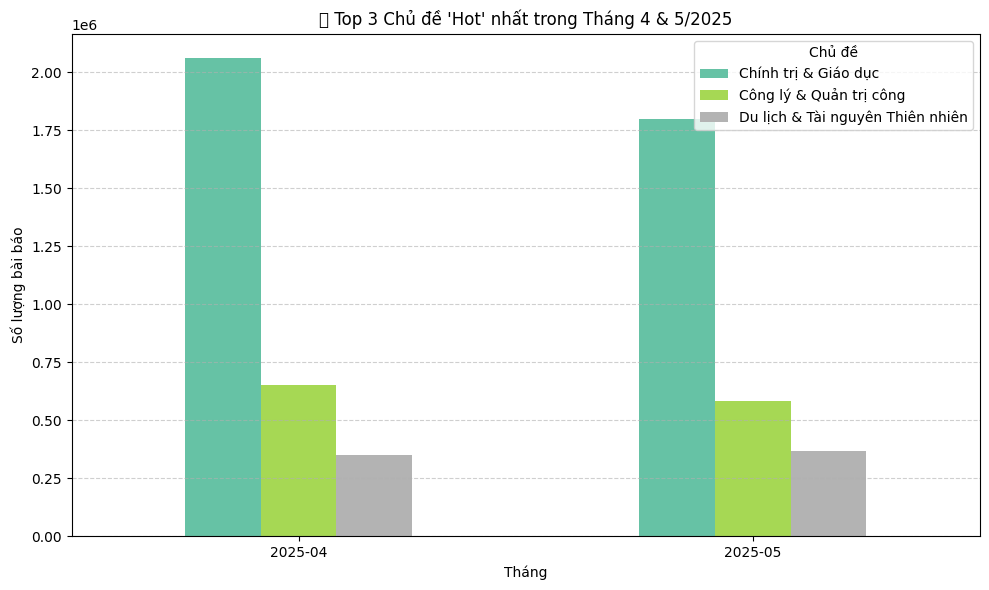

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có df_all chứa các cột: DATE, CLUSTER_LABEL
# Chuẩn hóa cột ngày
df_all["DATE"] = pd.to_datetime(df_all["DATE"], format="%Y%m%d")
df_all["MONTH"] = df_all["DATE"].dt.to_period("M")

# Đếm số lượng bài theo cụm chủ đề mỗi tháng
monthly_counts = df_all.groupby(["MONTH", "CLUSTER_LABEL"]).size().unstack(fill_value=0)

# Chọn dữ liệu tháng 4 và 5 năm 2025
selected_months = [pd.Period("2025-04"), pd.Period("2025-05")]
monthly_filtered = monthly_counts.loc[selected_months]

# Tính tổng 2 tháng để lấy Top 3 chủ đề nhiều nhất
top_3_labels = monthly_filtered.sum(axis=0).sort_values(ascending=False).head(3).index
top_3_data = monthly_filtered[top_3_labels]

# Vẽ biểu đồ
top_3_data.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("📈 Top 3 Chủ đề 'Hot' nhất trong Tháng 4 & 5/2025")
plt.xlabel("Tháng")
plt.ylabel("Số lượng bài báo")
plt.xticks(rotation=0)
plt.legend(title="Chủ đề")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
